<a href="https://colab.research.google.com/github/last-war/HW_DataScience/blob/Homework-02/Hw2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Частина третя: Аналіз датасет c Kaggle.com
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url ="/content/drive/MyDrive/Colab Notebooks/bestsellers with categories.csv"
df = pd.read_csv(url)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction



Відповідь: Про скільки книг зберігає дані датасет?

**550**


In [2]:
df.shape[0]

550

In [3]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

Відповідь: Чи є в якихось змінних пропуски? (Так / ні) 

**no**

In [4]:
for cur_col in df.columns:
    print(df[cur_col].isnull().max())


False
False
False
False
False
False
False


Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

Відповідь: Які є унікальні жанри? 
**'Non Fiction' 'Fiction'**

In [5]:
print(pd.unique(df['genre']))

['Non Fiction' 'Fiction']


Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

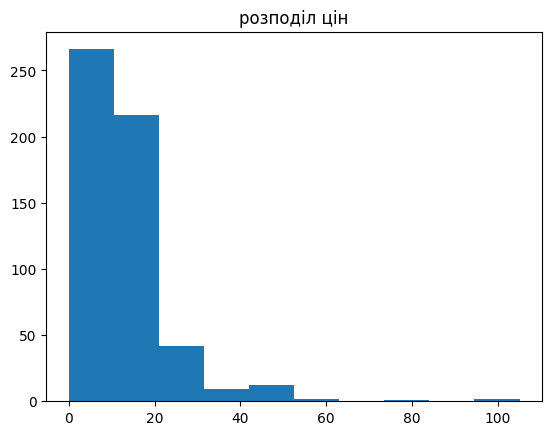

In [6]:
plt.hist(df['price'], bins=10)
plt.title('розподіл цін')
plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

Відповідь: Максимальна ціна? **105**

Відповідь: Мінімальна ціна? **0**

Відповідь: Середня ціна? **13.1**

Відповідь: Медіанна ціна? **11**

In [7]:
print(df['price'].describe())

print(df['price'].max())
print(df['price'].min())
print(df['price'].mean())
print(df['price'].median())

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: price, dtype: float64
105
0
13.1
11.0


Відповідь: Який рейтинг у датасеті найвищий? 

Відповідь: **4.9**

In [8]:
print(df['user_rating'].max())

4.9


Відповідь: Скільки книг мають такий рейтинг?

Відповідь: **52**

In [9]:
print(df[df['user_rating'] == df['user_rating'].max()].count())

name           52
author         52
user_rating    52
reviews        52
price          52
year           52
genre          52
dtype: int64



Відповідь: Яка книга має найбільше відгуків? 

Відповідь: **Where the Crawdads Sing**

In [10]:
print(df[df['reviews'] == df['reviews'].max()]['name'])

534    Where the Crawdads Sing
Name: name, dtype: object


Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:
**Publication Manual of the American Psychologic...**

In [11]:
#tmp = df[df['year'] == 2015]
df[df['year'] == 2015][df[df['year'] == 2015]['price'] == df[df['year'] == 2015]['price'].max()]['name']


277    Publication Manual of the American Psychologic...
Name: name, dtype: object

Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 

Відповідь: **20**

In [12]:
df[(df['genre'] == 'Fiction') & (df['year'] == 2010  )].count()

name           20
author         20
user_rating    20
reviews        20
price          20
year           20
genre          20
dtype: int64

Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

Відповідь: **1**

In [13]:
df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))].count()

name           1
author         1
user_rating    1
reviews        1
price          1
year           1
genre          1
dtype: int64

І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
Відповідь: Яка книга остання у відсортованому списку?

Відповідь:
**Old School (Diary of a Wimpy Kid #10)**

In [14]:
df[(df['year'] == 2015) & (df['price'] < 8)].sort_values('price')

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [70]:
newdf = df.groupby(['genre'])
f_mas = newdf.agg({'price':['min', 'max']})
f_mas

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

Відповідь: Максимальна ціна для жанру Fiction: 

Відповідь **82**

Відповідь: Мінімальна ціна для жанру Fiction: 

Відповідь **0**

Відповідь: Мінімальна ціна для жанру Non Fiction: 

Відповідь **0**

Відповідь: Максимальна ціна для жанру Non Fiction: 

Відповідь **105**

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

Відповідь: Якої розмірності вийшла таблиця? 

Відповідь: **(248, 1)**

In [71]:
newdf = df.groupby(['author'])
f_mas = newdf.agg({'name':['count']})
f_mas.shape

(248, 1)

Відповідь: Який автор має найбільше книг?
 Відповідь: **American Psychological Association**

 Відповідь: Скільки книг цього автора? 
 
 Відповідь: **10**

In [72]:
newdf = df.groupby(['author','name'])
f_mas = newdf.agg(count_books=('name', 'count'))
print(f_mas.max())
print(f_mas['count_books'].idxmax()[0])


count_books    10
dtype: int64
American Psychological Association


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

Відповідь: У якого автора середній рейтинг мінімальний? 

Відповідь: **J.K. Rowling**

Відповідь: Який у цього автора середній рейтинг? 

Відповідь: **3.3**

In [73]:
newdf = df.groupby(['author','user_rating'])
f_mas2 = newdf.agg(mean_rating=('user_rating', 'mean'))
f_mas2['mean_rating'].idxmin()

('J.K. Rowling', 3.3)

З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [88]:
newdf = df.groupby(['author']).agg(count_books=('name', 'count'))
newdf2 = df.groupby(['author']).agg(mean_rating=('user_rating', 'mean'))
rez = pd.concat([newdf, newdf2], axis=1)
rez

,count_books,mean_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

Відповідь: Який автор перший у списку?

**Muriel Barbery**

In [89]:
sorted = rez.sort_values(by=['count_books', 'mean_rating'], axis=0)
print(sorted)


                                    count_books  mean_rating
author                                                      
Muriel Barbery                                1     4.000000
Chris Cleave                                  1     4.100000
Ian K. Smith M.D.                             1     4.100000
Pierre Dukan                                  1     4.100000
Elizabeth Strout                              1     4.200000
...                                         ...          ...
American Psychological Association           10     4.500000
Suzanne Collins                              11     4.663636
Gary Chapman                                 11     4.736364
Rick Riordan                                 11     4.772727
Jeff Kinney                                  12     4.800000

[248 rows x 2 columns]


[Text(0.5, 1.0, 'рейтинг книг топ авторів та кількість книг')]

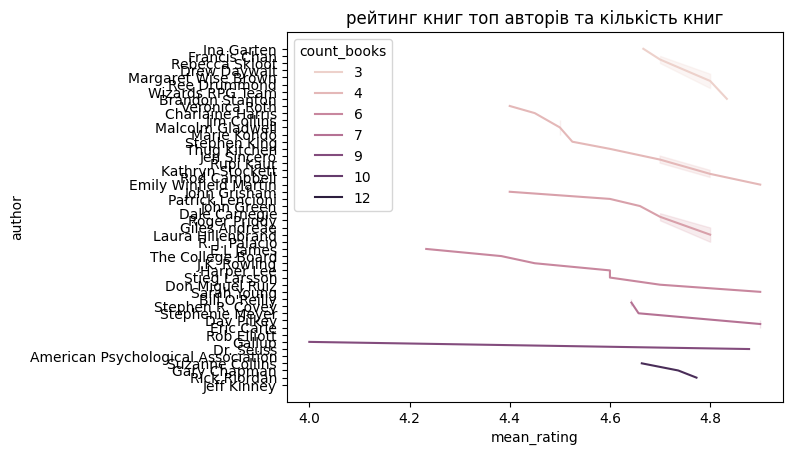

In [92]:
sns.lineplot(data=sorted[200:], x="mean_rating", y="author", hue="count_books").set(title='рейтинг книг топ авторів та кількість книг')

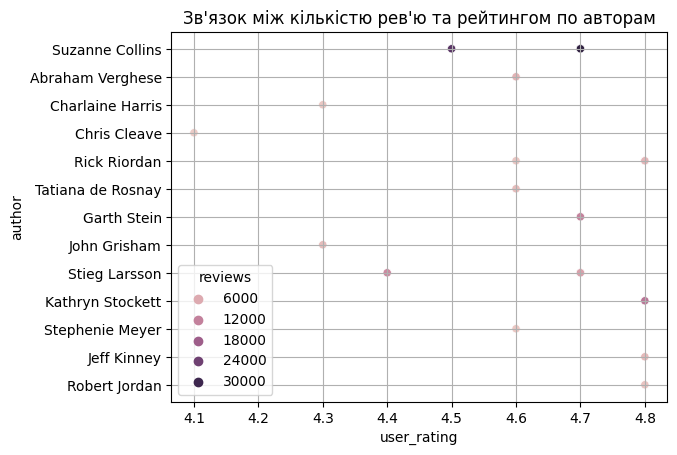

In [93]:
newdf = df[(df['genre'] == 'Fiction') & (df['year'] == 2010  )]

sns.scatterplot(data=newdf, x="user_rating", y="author", hue="reviews").set(title="Зв'язок між кількістю рев'ю та рейтингом по авторам")
plt.grid()